In [1]:
%matplotlib inline

import gdal

import os.path as path
import stripy as stripy
import numpy as np

import pyproj

import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt


In [2]:
ico0 = stripy.icosahedral_mesh(refinement_levels=0)
ico1 = stripy.icosahedral_mesh(refinement_levels=1)
ico2 = stripy.icosahedral_mesh(refinement_levels=2)
ico3 = stripy.icosahedral_mesh(refinement_levels=3)
ico4 = stripy.icosahedral_mesh(refinement_levels=4)
ico5 = stripy.icosahedral_mesh(refinement_levels=5)
ico6 = stripy.icosahedral_mesh(refinement_levels=6)
ico7 = stripy.icosahedral_mesh(refinement_levels=7)

print "Size of mesh - 1 ", ico1.points.shape[0]
print "Size of mesh - 2 ", ico2.points.shape[0]
print "Size of mesh - 3 ", ico3.points.shape[0]
print "Size of mesh - 4 ", ico4.points.shape[0]
print "Size of mesh - 5 ", ico5.points.shape[0]
print "Size of mesh - 6 ", ico6.points.shape[0]
print "Size of mesh - 7 ", ico7.points.shape[0]


Size of mesh - 1  42
Size of mesh - 2  162
Size of mesh - 3  642
Size of mesh - 4  2562
Size of mesh - 5  10242
Size of mesh - 6  40962
Size of mesh - 7  163842


In [3]:
## Five refinement strategies:
##
## - All segments connected to a given node
## - All triangles connected to a given node by centroid or by edges
## - A given triangle by edges or by centroid


mlons, mlats = ico3.midpoint_refine_triangulation_by_vertices(vertices=[1,2,3,4,5,6,7,8,9,10])
ico3mv = stripy.sTriangulation(mlons, mlats)

mlons, mlats = ico3.edge_refine_triangulation_by_vertices(vertices=[1,2,3,4,5,6,7,8,9,10])
ico3ev = stripy.sTriangulation(mlons, mlats)

mlons, mlats = ico3.centroid_refine_triangulation_by_vertices(vertices=[1,2,3,4,5,6,7,8,9,10])
ico3cv = stripy.sTriangulation(mlons, mlats)

mlons, mlats = ico3.edge_refine_triangulation_by_triangles(triangles=[1,2,3,4,5,6,7,8,9,10])
ico3et = stripy.sTriangulation(mlons, mlats)

mlons, mlats = ico3.centroid_refine_triangulation_by_triangles(triangles=[1,2,3,4,5,6,7,8,9,10])
ico3ct = stripy.sTriangulation(mlons, mlats)


print ico3mv.npoints, ico3mv.simplices.shape[0]
print ico3ev.npoints, ico3ev.simplices.shape[0]
print ico3cv.npoints, ico3cv.simplices.shape[0]
print ico3et.npoints, ico3et.simplices.shape[0]
print ico3ct.npoints, ico3ct.simplices.shape[0]


692 1380
742 1480
692 1380
664 1324
652 1300


In [4]:
points = np.array([[ 0.03, 0.035], [0.05,0.055]]).T

In [5]:
triangulations = [ico1]
nearest, distances = triangulations[-1].nearest_vertex(points[:,0], points[:,1])

max_depth = 15

while nearest[0] == nearest[1] and max_depth > 0:

    lons, lats = triangulations[-1].centroid_refine_triangulation_by_vertices(vertices=nearest[0])
    new_triangulation = stripy.sTriangulation(lons, lats)
    nearest, distances = new_triangulation.nearest_vertex(points[:,0], points[:,1])
    triangulations.append(new_triangulation)
    
    max_depth -= 1

print "refinement_steps =", len(triangulations)

centroid_triangulations = triangulations[:]

refinement_steps = 5


In [6]:
triangulations = [ico1]
nearest, distances = triangulations[-1].nearest_vertex(points[:,0], points[:,1])

max_depth = 15

while nearest[0] == nearest[1] and max_depth > 0:

    lons, lats = triangulations[-1].edge_refine_triangulation_by_vertices(vertices=nearest[0])
    new_triangulation = stripy.sTriangulation(lons, lats)
    nearest, distances = new_triangulation.nearest_vertex(points[:,0], points[:,1])
    triangulations.append(new_triangulation)
    
    max_depth -= 1

print "refinement_steps =", len(triangulations)

edge_triangulations = triangulations[:]

refinement_steps = 6


In [7]:
triangulations = [ico1]

in_triangle = triangulations[-1].containing_triangle(points[:,0], points[:,1])

max_depth = 100

while in_triangle[0] == in_triangle[1] and max_depth > 0:

    lons, lats = triangulations[-1].edge_refine_triangulation_by_triangles(in_triangle[0])
    new_triangulation = stripy.sTriangulation(lons, lats)
    in_triangle = new_triangulation.containing_triangle(points[:,0], points[:,1])
    triangulations.append(new_triangulation)
    
    print in_triangle


    
    if in_triangle.shape[0] == 0:
        break
    
    max_depth -= 1

print "refinement_steps =", len(triangulations)

edge_t_triangulations = triangulations[:]

[85 85]
[90 90]
[92 92]
[102 102]
[103 103]
[114 103]
refinement_steps = 7


In [8]:
triangulations = [ico1]

in_triangle = triangulations[-1].containing_triangle(points[:,0], points[:,1])

max_depth = 100

while in_triangle[0] == in_triangle[1] and max_depth > 0:

    lons, lats = triangulations[-1].centroid_refine_triangulation_by_triangles(in_triangle[0])
    new_triangulation = stripy.sTriangulation(lons, lats)
    in_triangle = new_triangulation.containing_triangle(points[:,0], points[:,1])
    triangulations.append(new_triangulation)
    
    print in_triangle
    
    if in_triangle.shape[0] == 0:
        break
    
    max_depth -= 1

print "refinement_steps =", len(triangulations)

centroid_t_triangulations = triangulations[:]

[63 63]
[69 69]
[85 85]
[64 64]
[87 87]
[91 91]
[92 92]
[92 92]
[96 96]
[99 97]
refinement_steps = 11


In [1]:
# from glucifer import lavavu as lv

triangulations = edge_triangulations

from LavaVu import lavavu

wireframeI = triangulations[-1]
trianglesI = triangulations[-1]
nodes1I = triangulations[0]
nodes2I = triangulations[-1]


lv = lavavu.Viewer(border=False, background="#FFFFFF", resolution=[1000,600], near=-10.0)

tris = lv.triangles("triangulation",  wireframe=True, colour="#444444", opacity=0.8)
tris.vertices(wireframeI.points)
tris.indices(wireframeI.simplices)

tris2 = lv.triangles("triangles",  wireframe=False, colour="#77ff88", opacity=0.8)
tris2.vertices(trianglesI.points)
tris2.indices(trianglesI.simplices)

nodes = lv.points("nodes", pointsize=10.0, pointtype="shiny", colour="#448080", opacity=0.75)
nodes.vertices(nodes1I.points*1.01)

nodes2 = lv.points("nodes2", pointsize=2.0, pointtype="shiny", colour="FF0000", opacity=0.75)
nodes2.vertices(nodes2I.points*1.01)

nodes3 = lv.points("SplitPoints", pointsize=1.0, pointtype="shiny", colour="FF55000", opacity=1.0) 
nodes3.vertices(np.array(stripy.spherical.lonlat2xyz(points[:,0], points[:,1])).T * 1.01)



lv.window()

# lv.control.Panel()
lv.control.Range('specular', range=(0,1), step=0.1, value=0)
lv.control.Checkbox(property='axis')
lv.control.ObjectList()
lv.control.show()



NameError: name 'edge_triangulations' is not defined

In [10]:
np.array(stripy.spherical.lonlat2xyz(points[:,0], points[:,1])).T

array([[ 0.99830086,  0.02995801,  0.04997917],
       [ 0.99787637,  0.03493994,  0.05497228]])

CTT 100 3.4285957434 1.00002233292 32.7495158126
CTN 126 2.89223128481 1.00002233292 11.6915670654
ETT 116 32.0500264233 1.00002233292 69.2670664094
ETN 200 4.54010451755 1.00002233292 35.2792325591


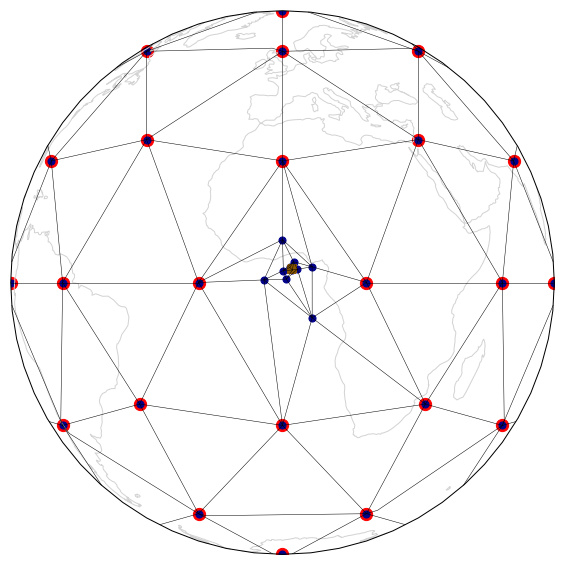

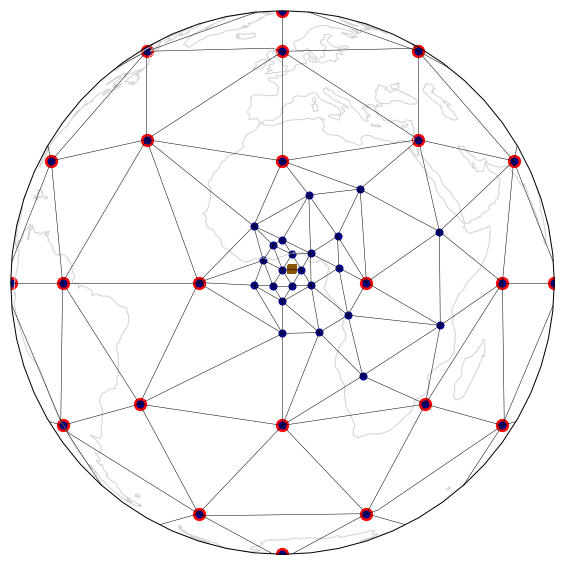

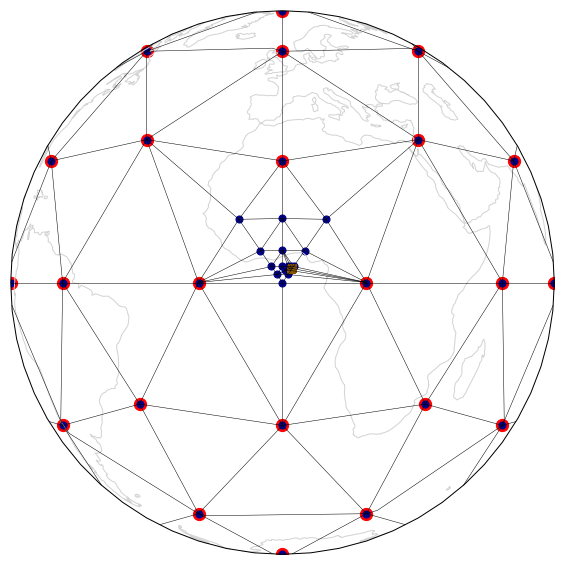

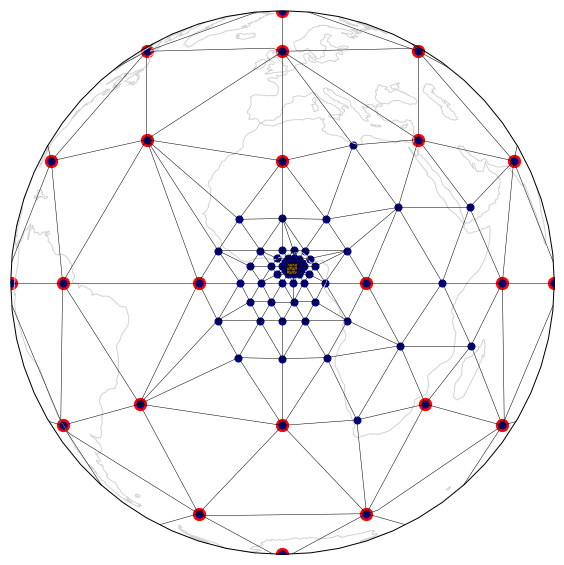

In [11]:
def mesh_fig(mesh, meshR, name):

    fig = plt.figure(figsize=(10, 10), facecolor="none")
    ax  = plt.subplot(111, projection=ccrs.Orthographic(central_longitude=0.0, central_latitude=0.0, globe=None))
    ax.coastlines(color="lightgrey")
    ax.set_global()

    generator = mesh
    refined   = meshR

    lons0 = np.degrees(generator.lons)
    lats0 = np.degrees(generator.lats)

    lonsR = np.degrees(refined.lons)
    latsR = np.degrees(refined.lats)

    lst = refined.lst
    lptr = refined.lptr


    ax.scatter(lons0, lats0, color="Red",
                marker="o", s=150.0, transform=ccrs.Geodetic())

    ax.scatter(lonsR, latsR, color="DarkBlue",
                marker="o", s=50.0, transform=ccrs.Geodetic())

    ax.scatter(np.degrees(points[:,0]), np.degrees(points[:,1]), marker="s", s=50, 
               color="#885500", transform=ccrs.Geodetic())

    for i in range(0,len(lst),1):
        n1 = lst[i]-1
        n2 = lst[lptr[i]-1]-1
        if n1 < n2:
            ax.plot( [lonsR[n1], lonsR[n2]],
                     [latsR[n1], latsR[n2]], 
                      linewidth=0.5, color="black", transform=ccrs.Geodetic())

    fig.savefig(name, dpi=250, transparent=True)
    
    return

mesh_fig(centroid_t_triangulations[0],  centroid_t_triangulations[-1], "CentroidByTriangle" )

T = centroid_t_triangulations[-1]
E = np.array(T.edge_lengths()).T
A = np.array(T.areas()).T
equant = np.max(E, axis=1) / np.min(E, axis=1)
size_ratio = np.sqrt(np.max(A) / np.min(A))
print "CTT", T.simplices.shape[0], equant.max(), equant.min(), size_ratio


mesh_fig(centroid_triangulations[0],    centroid_triangulations[-1],   "CentroidByVertex" )

T = centroid_triangulations[-1]
E = np.array(T.edge_lengths()).T
A = np.array(T.areas()).T
equant = np.max(E, axis=1) / np.min(E, axis=1)
size_ratio = np.sqrt(np.max(A) / np.min(A))
print "CTN", T.simplices.shape[0], equant.max(), equant.min(), size_ratio


mesh_fig(edge_t_triangulations[0],      edge_t_triangulations[-1],     "EdgeByTriangle" )


T = edge_t_triangulations[-1]
E = np.array(T.edge_lengths()).T
A = np.array(T.areas()).T
equant = np.max(E, axis=1) / np.min(E, axis=1)
size_ratio = np.sqrt(np.max(A) / np.min(A))
print "ETT", T.simplices.shape[0], equant.max(), equant.min(), size_ratio


mesh_fig(edge_triangulations[0],        edge_triangulations[-1],     "EdgeByVertex" )

T = edge_triangulations[-1]
E = np.array(T.edge_lengths()).T
A = np.array(T.areas()).T
equant = np.max(E, axis=1) / np.min(E, axis=1)
size_ratio = np.sqrt(np.max(A) / np.min(A))
print "ETN", T.simplices.shape[0], equant.max(), equant.min(), size_ratio






In [12]:
## Number of triangles added, distribution of shapes